## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import demoji
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import nltk

import unicodedata

from wordcloud import WordCloud

nltk.download('stopwords')

port_stem=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing the Dataset 

In [3]:
suicide_df = pd.read_csv('C:\\Users\\Vijay\\Desktop\\DATA SCIENCE\\PROJECTS\\Sucide Detection NLP and ML\\Suicide_Detection.csv')

In [4]:
suicide_df.shape

(232074, 3)

### Perfroming Data Preprocessing 

In [5]:
suicide_df['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [6]:
suicide_df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [7]:
suicide_df.duplicated().sum()

0

In [8]:
suicide_df.shape

(232074, 3)

In [9]:
suicide_df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [10]:
# Dropping the column Unnamed: 0

suicide_df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
suicide_df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [12]:
suicide_df['class'].value_counts()

non-suicide    116037
suicide        116037
Name: class, dtype: int64

### As we can see above the data is evenly distributed between the classes

In [13]:
#Creating a Sample Class from both the given classes
suicide_samples     = suicide_df[suicide_df['class'] == 'suicide'].sample(4000, random_state=10)
non_suicide_samples = suicide_df[suicide_df['class'] == 'non-suicide'].sample(4000, random_state=10)

In [14]:
suicide_df_2 = pd.concat([suicide_samples, non_suicide_samples])
suicide_df_2

,text,class
228314,Why do I feel so alone?(23M) I’m currently liv...,suicide
30639,"I feel worse now, don't know what to do.I just...",suicide
112984,"helloAITA kicked me to this sub, i dont even f...",suicide
118167,💔i’m tearing myself apart i need a girl to lov...,suicide
210774,My plan was to make it through the entire mont...,suicide
...,...,...
177282,"What's an amazing, but criminally underrated b...",non-suicide
217842,I fucked a $350 Honda Accord No I didn't actua...,non-suicide
151268,Why the fuck do people play with feelings like...,non-suicide
72694,I have a question Does anyone know about psr?,non-suicide


### Here we are creating a function which we will use to clean the data with removing unwanted characters, 
### stopwords, lowercasing, stemming and lemmatizing, etc.

In [15]:
def clean_text(text):
    text = re.sub(r"\S*https?:\S*", '', text, flags=re.MULTILINE)  # Remove links in text
    text = demoji.replace(text, '')
    
    
#  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.strip()
    text = text.split()
    text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

#### Using the above function we are cleaning the Data

In [16]:
suicide_df_2['text'] = suicide_df_2['text'].apply(lambda x: clean_text(x))

In [17]:
suicide_df_2

,text,class
228314,feel alon current live alon good job car girlf...,suicide
30639,feel wors know got phone suicid hotlin tell fe...,suicide
112984,helloaita kick sub dont even feel suicid smh,suicide
118167,tear apart need girl love talk confid go insan,suicide
210774,plan make entir month april without feel suici...,suicide
...,...,...
177282,amaz crimin underr band artist wanna find new ...,non-suicide
217842,fuck honda accord actual fuck friend split cos...,non-suicide
151268,fuck peopl play feel like like like know like ...,non-suicide
72694,question anyon know psr,non-suicide


#### tokenizing the text in the 'text' column then joining all of those words into one string.

In [18]:
all_words = ' '.join([word for word in suicide_df_2[suicide_df_2['class']=='suicide']['text']])

tokenized_words = nltk.tokenize.word_tokenize(all_words)

fdist = FreqDist(tokenized_words)


#### Creating a frequency distribution object to check the occurance of the particular word in "Text" Column

In [19]:
df_fdist = pd.DataFrame([fdist])
df_fdist = df_fdist.T.reset_index()
df_fdist = df_fdist.rename(columns={'index': 'word', 0: 'freq'}).sort_values('freq', ascending=False)
df_fdist

,word,freq
49,want,5782
0,feel,5375
14,like,4998
61,know,4011
11,go,3937
...,...,...
8259,scissor,1
3977,afyer,1
3978,anbul,1
8256,peacewhen,1


#### plotting a bar graph with the top 50 words from a df_fdist.

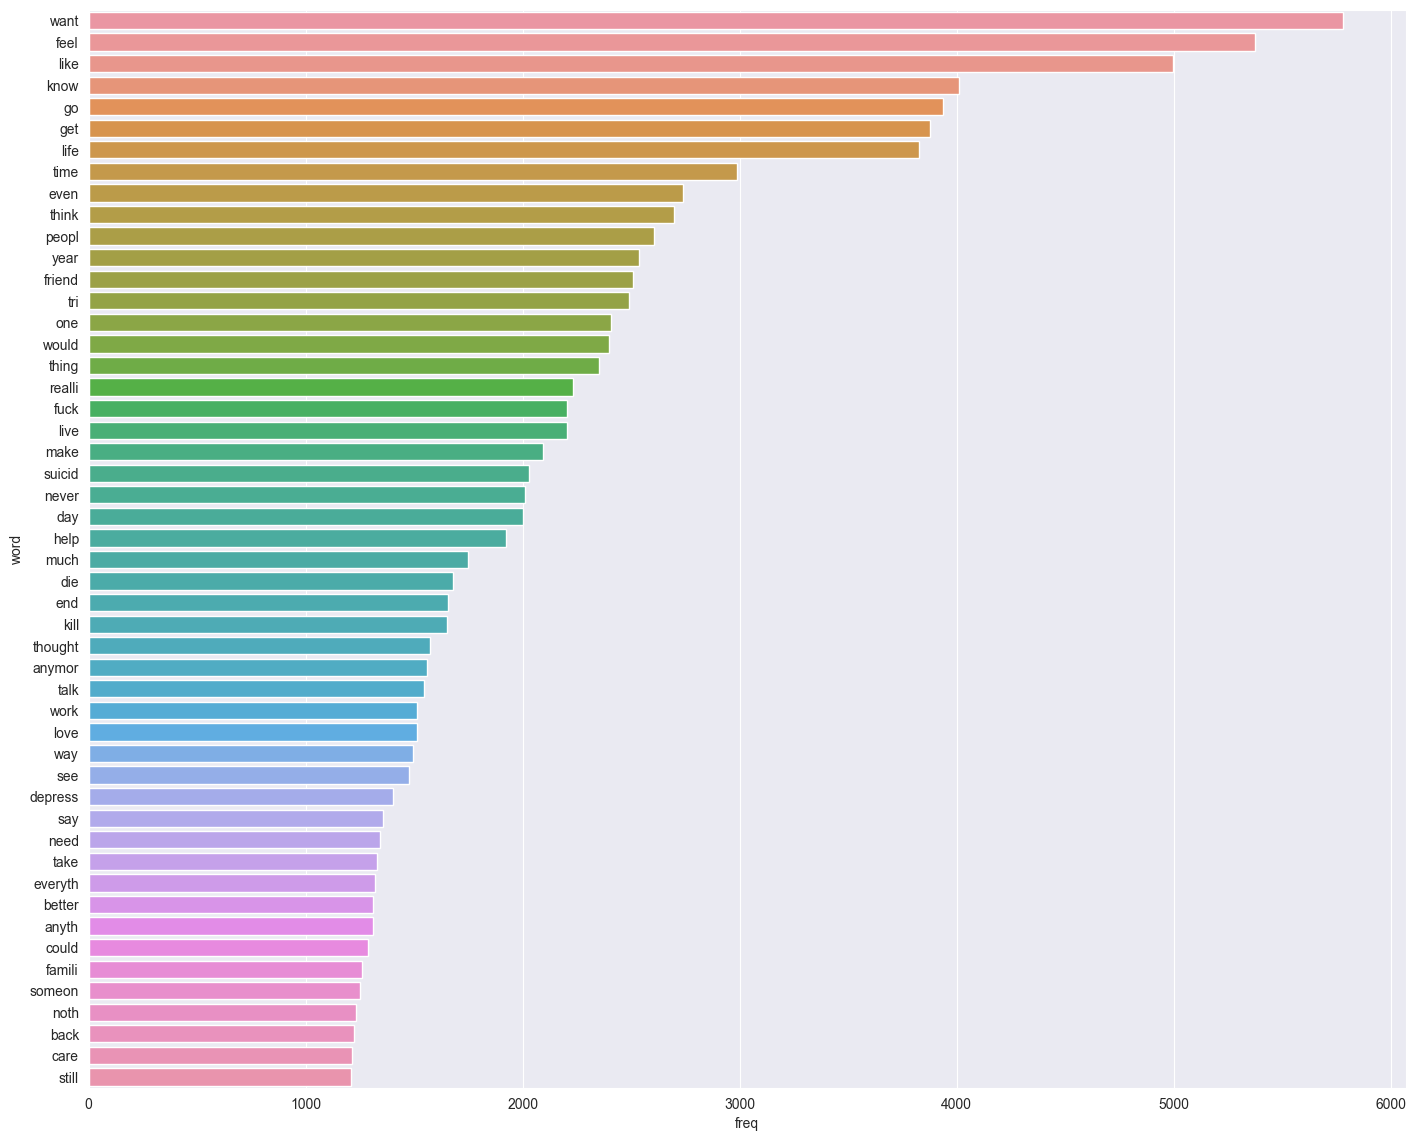

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(17, 14))
sns.barplot(y=df_fdist.word.head(50), x=df_fdist.freq.head(50));

#### Word Cloud for the Text

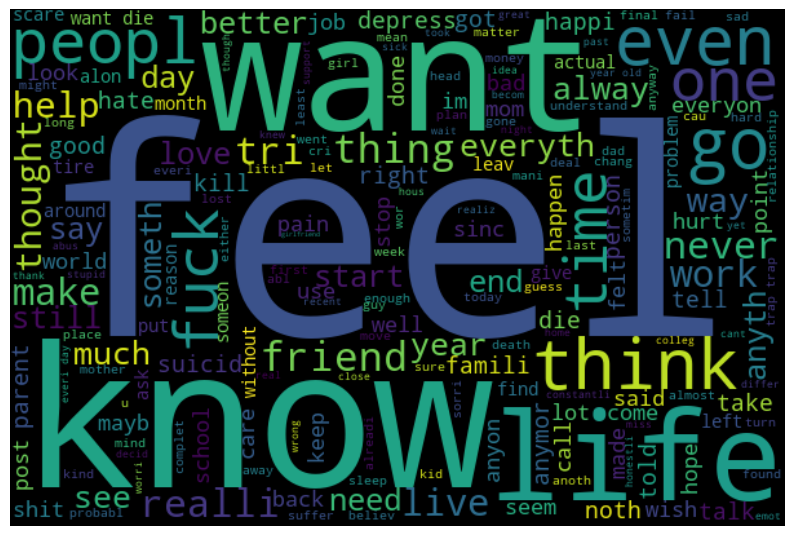

In [21]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     ).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

#### Defining 'X' As a Input and 'y' as a output 

In [22]:
X = suicide_df_2['text']
y = suicide_df_2['class']

#### Using label encoding with map where [0 = 'non-suicide'] and [1 = 'Suicide']

In [23]:
y = y.map({'suicide': 1, 'non-suicide': 0})

#### Using TfidfVectorizer to convert 'X' to create the matrix.

In [24]:
vector = TfidfVectorizer()
X      = vector.fit_transform(X)

In [25]:
print(X)

  (0, 11616)	0.06317654977858876
  (0, 14283)	0.06353488761419382
  (0, 16014)	0.11840257814163654
  (0, 5181)	0.07437566435010047
  (0, 4020)	0.05833174340272624
  (0, 2252)	0.07501932413565038
  (0, 5834)	0.06969143600527793
  (0, 9837)	0.050904524118618115
  (0, 4256)	0.14115336106851015
  (0, 2740)	0.09349246654812851
  (0, 14790)	0.09784320838986196
  (0, 12191)	0.11393981387960149
  (0, 8502)	0.10652218619182278
  (0, 2825)	0.08200505266439011
  (0, 5675)	0.12784500619424197
  (0, 10509)	0.06244858326252995
  (0, 12530)	0.04689052264583895
  (0, 6364)	0.057210043386257445
  (0, 4908)	0.0753137037032048
  (0, 5229)	0.05563692888579256
  (0, 2748)	0.10808634260208026
  (0, 161)	0.09784320838986196
  (0, 3489)	0.1783389291847269
  (0, 1525)	0.10652218619182278
  (0, 8829)	0.0600256962803485
  :	:
  (7998, 7971)	0.19605139202436422
  (7998, 704)	0.2770654693774801
  (7999, 2526)	0.37683283220407504
  (7999, 3470)	0.3322895352883173
  (7999, 3057)	0.3487291408577557
  (7999, 14820)	0.

#### Splitting the Data into train_test with the proportion of 80% test and 20% Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    shuffle = True,
                                                    random_state = 77)

In [27]:
print('Train size:', X_train.shape)
print('Test  size:', X_test.shape)

Train size: (6400, 16409)
Test  size: (1600, 16409)


#### Using Machine Learning Models to Evaluate The Accuracy

In [28]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score
from sklearn import metrics

#### Creating a Function "evaluate_model" which will print the performance and accuracy of the Models

In [29]:
def evaluate_model(y_pred, y_test):
    print('Accuracy:', accuracy_score(y_pred,y_test))
    print('Recall:', recall_score(y_pred,y_test))
    print('F1 Score', f1_score(y_pred,y_test))
    print('Precision', precision_score(y_pred,y_test))
    print('Confusion Matrix:\n' )
    sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, fmt='g');

# Explaination of above Function

#### accuracy_score(y_pred,y_test): which computes the accuracy of the model, which is the ratio of correct predictions to total predictions.
#### recall_score(y_pred,y_test): which computes the recall of the model, which is the ratio of true positive predictions to the total number of actual positive cases.
#### f1_score(y_pred,y_test): which computes the F1 score, which is a harmonic mean of precision and recall.
#### precision_score(y_pred,y_test): which computes the precision of the model, which is the ratio of true positive predictions to the total number of positive predictions.
#### confusion_matrix(y_pred,y_test): which computes the confusion matrix, which is a table showing the number of true positive, true negative, false positive, and false negative predictions made by the model.

### Testing with LOGISTIC REGRESSION

In [30]:
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.9125
Recall: 0.9285714285714286
F1 Score 0.9108280254777071
Precision 0.89375
Confusion Matrix:



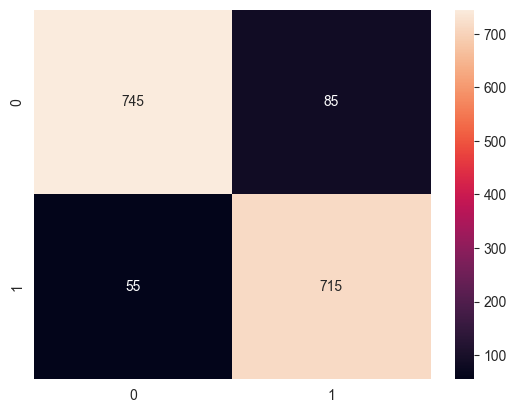

In [32]:
evaluate_model(y_pred,y_test)

In [33]:
frase = "I would like one more chance, but I can't take it anymore"
frase = clean_text(frase)
t     = vector.transform(pd.Series(frase))
pred  = model.predict(t)
pred

array([1], dtype=int64)

### Testing with SVM

In [34]:
model = SVC(kernel='linear', random_state=77)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.91625
Recall: 0.9247448979591837
F1 Score 0.9154040404040403
Precision 0.90625
Confusion Matrix:



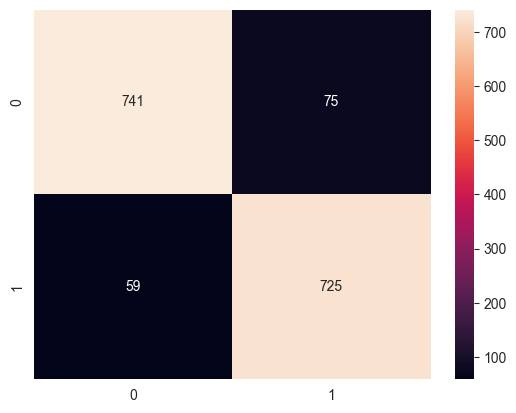

In [35]:
evaluate_model(y_pred, y_test)

In [36]:
frase = "i’m tearing myself apart i need a girl to love and talk to and confide in i’m going insane"
frase = clean_text(frase)
t     = vector.transform(pd.Series(frase))
pred  = model.predict(t)
pred

array([1], dtype=int64)